In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [14]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [15]:
df_org=pd.read_csv('train_jqd04QH.csv')
df_test=pd.read_csv('test_KaymcHn.csv')
df_sub=pd.read_csv('sample_submission_sxfcbdx.csv')
df_copy=df_org.copy()

In [16]:
df_copy

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18354,25366,city_103,0.920,Male,Has relevent experience,Full time course,Graduate,STEM,5,<10,Pvt Ltd,1,71,0
18355,25545,city_160,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,15,50-99,Pvt Ltd,1,160,0
18356,11514,city_114,0.926,Male,Has relevent experience,no_enrollment,Masters,STEM,11,50-99,Pvt Ltd,3,18,0
18357,1689,city_75,0.939,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10/49,Pvt Ltd,3,41,0


In [17]:
def feature_preprocessing(data):
    x1=np.nan
    data['nan_main']=data.apply(lambda x:list(x.loc[['education_level','major_discipline','experience','company_size','company_type']].values).count(x1),axis=1)
    x=pd.DataFrame(data.city.value_counts(normalize=True))
    x['city_name']=x.index
    x.reset_index(drop=True,inplace=True)
    x.columns=['count_city','city']
    data=pd.merge(data,x,on='city',how='left')
    
    x=pd.DataFrame(data.education_level.value_counts(normalize=True))
    x['education_level_1']=x.index
    x.columns=['count_eduction_level','education_level']
    x.reset_index(drop=True,inplace=True)
    data=pd.merge(left=data,right=x,on='education_level',how='left')

    x=pd.DataFrame(data.major_discipline.value_counts(normalize=True))
    x['major_discipline1']=x.index
    x.columns=['count_major_discipline_level','major_discipline']
    x.reset_index(drop=True,inplace=True)
    data=pd.merge(left=data,right=x,on='major_discipline',how='left')
    return data


def feature_engineering(data):
    data['gender']=data['gender'].fillna(data['gender'].mode()[0])
    data['enrolled_university']=data['enrolled_university'].fillna(data['enrolled_university'].mode()[0])
    data['education_level']=data['education_level'].fillna(data['education_level'].mode()[0])
    data['major_discipline']=data['major_discipline'].fillna(data['major_discipline'].mode()[0])
    data['experience']=data['experience'].fillna(data['experience'].mode()[0])
    data['company_size']=data['company_size'].fillna(data['company_size'].mode()[0])
    data['company_type']=data['company_type'].fillna(data['company_type'].mode()[0])
    data['last_new_job']=data['last_new_job'].fillna(data['last_new_job'].mode()[0])
    return data

In [18]:
df_copy=feature_preprocessing(df_copy)
df_test=feature_preprocessing(df_test)
df_copy=feature_engineering(df_copy)
df_test=feature_engineering(df_test)

In [19]:
cols=df_copy.select_dtypes('object').columns
for i in cols:
    lb=LabelEncoder()
    unique_val=list(set(df_copy[i].unique().tolist()+df_test[i].unique().tolist()))
    lb.fit(unique_val)
    df_copy[i]=lb.transform(df_copy[i])
    df_test[i]=lb.transform(df_test[i])

In [20]:
# df_copy=df_copy.drop(['enrollee_id'],axis=1)
# df_test=df_test.drop(['enrollee_id'],axis=1)

In [21]:
import pycaret

In [22]:
from pycaret.classification import *

In [23]:
exp1 = setup(df_copy, target = 'target',feature_selection=True)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,443
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(18359, 18)"
4,Missing Values,True
5,Numeric Features,16
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [24]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Logistic Regression,0.8679,0.534,0,0,0,0
1,Ridge Classifier,0.8679,0,0,0,0,0
2,Extreme Gradient Boosting,0.8679,0.6486,0.0053,0.4,0.0104,0.0077
3,Gradient Boosting Classifier,0.8676,0.6483,0.0083,0.345,0.0161,0.0111
4,Linear Discriminant Analysis,0.8672,0.6464,0.0153,0.4137,0.0295,0.0204
5,Light Gradient Boosting Machine,0.8669,0.6289,0.0194,0.4078,0.037,0.0255
6,Ada Boost Classifier,0.8665,0.6381,0.0077,0.2736,0.0149,0.0082
7,CatBoost Classifier,0.8662,0.6306,0.02,0.3999,0.0378,0.025
8,Random Forest Classifier,0.8575,0.5915,0.0365,0.2465,0.0635,0.0297
9,Extra Trees Classifier,0.8557,0.6043,0.0507,0.2613,0.0846,0.0438


In [34]:
gb_class=create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8670,0.6020,0.0059,0.3333,0.0116,0.0070
1,0.8685,0.6754,0.0237,0.5000,0.0452,0.0337
2,0.8669,0.6748,0.0059,0.2500,0.0116,0.0055
3,0.8677,0.6433,0.0059,0.3333,0.0116,0.0071
4,0.8654,0.6602,0.0059,0.2000,0.0114,0.0039
5,0.8677,0.6413,0.0118,0.5000,0.0230,0.0170
6,0.8677,0.6346,0.0000,0.0000,0.0000,0.0000
7,0.8677,0.6485,0.0000,0.0000,0.0000,0.0000
8,0.8700,0.6618,0.0176,1.0000,0.0347,0.0302
9,0.8669,0.6407,0.0059,0.3333,0.0116,0.0070


In [35]:
evaluate_model(gb_class)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [43]:
tune=tune_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8585,0.5706,0.0471,0.2857,0.0808,0.0451
1,0.8646,0.6705,0.0473,0.3810,0.0842,0.0568
2,0.8638,0.6424,0.0296,0.3125,0.0541,0.0320
3,0.8607,0.6313,0.0592,0.3333,0.1005,0.0634
4,0.8560,0.6109,0.0235,0.1739,0.0415,0.0102
5,0.8623,0.6331,0.0471,0.3478,0.0829,0.0530
6,0.8607,0.5819,0.0235,0.2353,0.0428,0.0192
7,0.8607,0.6261,0.0706,0.3636,0.1182,0.0786
8,0.8654,0.6697,0.0765,0.4483,0.1307,0.0958
9,0.8576,0.6092,0.0412,0.2593,0.0711,0.0361


In [44]:
tune=tune_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8686,0.5866,0.0059,1.0,0.0117,0.0102
1,0.8685,0.6538,0.0000,0.0,0.0000,0.0000
2,0.8685,0.6409,0.0000,0.0,0.0000,0.0000
3,0.8685,0.6058,0.0000,0.0,0.0000,0.0000
4,0.8669,0.6306,0.0000,0.0,0.0000,-0.0015
5,0.8677,0.6310,0.0000,0.0,0.0000,0.0000
6,0.8661,0.6111,0.0000,0.0,0.0000,-0.0031
7,0.8677,0.6302,0.0000,0.0,0.0000,0.0000
8,0.8677,0.6567,0.0000,0.0,0.0000,0.0000
9,0.8677,0.6285,0.0000,0.0,0.0000,0.0000


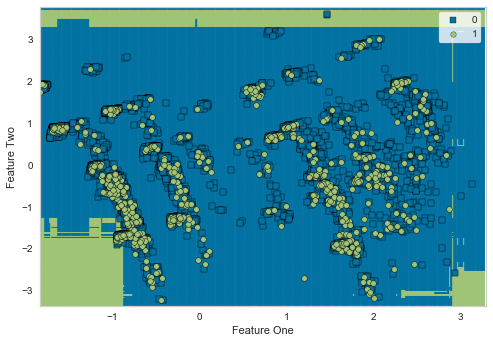

In [36]:
xgboost = create_model('gbc')
plot_model(xgboost, plot = 'boundary')

In [45]:
rf = predict_model(gb_class,data=df_test)

In [46]:
rf.Score

0        0.2763
1        0.0824
2        0.3616
3        0.1099
4        0.0939
          ...  
15016    0.0705
15017    0.1815
15018    0.2069
15019    0.1887
15020    0.2092
Name: Score, Length: 15021, dtype: float64

In [47]:
df_sub['target']=rf.Score

In [40]:
df_sub.to_csv('output_cgb_new_py.csv',index=False)